In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings("ignore") # specify to ignore warning messages

### Using State-Level Dataset:

In [2]:
# State-level dataset:

df = pd.read_csv('Apartment_List_Rent_Estimates_State_2021_7.csv')
df.shape

(300, 59)

In [3]:
df.head()

,State_Name,FIPS_Code,Population,Bedroom_Size,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,2017_07,2017_08,2017_09,2017_10,2017_11,2017_12,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,2018_09,2018_10,2018_11,2018_12,2019_01,2019_02,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,2020_01,2020_02,2020_03,2020_04,2020_05,2020_06,2020_07,2020_08,2020_09,2020_10,2020_11,2020_12,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06,2021_07
0,Alabama,1,4864680,_Overall,817.0,823.0,829.0,828.0,833.0,837.0,841.0,841.0,845.0,845.0,843.0,836.0,834.0,833.0,836.0,841.0,846.0,855.0,862.0,868.0,868.0,867.0,862.0,860.0,860.0,865.0,871.0,878.0,883.0,892.0,899.0,905.0,904.0,901.0,898.0,897.0,898.0,900.0,902.0,898.0,897.0,901.0,912.0,923.0,931.0,936.0,935.0,935.0,932.0,936.0,941.0,953.0,972.0,996.0,1023.0
1,Alabama,1,4864680,_Studio,625.0,630.0,634.0,634.0,638.0,641.0,644.0,644.0,647.0,647.0,646.0,640.0,638.0,638.0,640.0,644.0,648.0,654.0,660.0,665.0,665.0,663.0,660.0,658.0,659.0,662.0,667.0,672.0,676.0,683.0,688.0,693.0,692.0,690.0,687.0,686.0,688.0,689.0,691.0,688.0,687.0,690.0,698.0,707.0,713.0,717.0,716.0,716.0,713.0,717.0,720.0,730.0,744.0,762.0,783.0
2,Alabama,1,4864680,1br,635.0,640.0,644.0,644.0,648.0,651.0,654.0,653.0,657.0,657.0,656.0,650.0,648.0,647.0,650.0,654.0,658.0,664.0,670.0,675.0,675.0,674.0,670.0,668.0,669.0,672.0,677.0,682.0,686.0,693.0,699.0,704.0,703.0,700.0,698.0,697.0,698.0,700.0,701.0,698.0,697.0,700.0,709.0,718.0,724.0,728.0,727.0,727.0,724.0,728.0,731.0,741.0,756.0,774.0,795.0
3,Alabama,1,4864680,2br,779.0,786.0,791.0,791.0,795.0,799.0,803.0,803.0,807.0,807.0,805.0,798.0,796.0,795.0,798.0,803.0,808.0,816.0,823.0,829.0,829.0,827.0,823.0,821.0,821.0,825.0,832.0,838.0,843.0,852.0,859.0,864.0,863.0,860.0,857.0,856.0,858.0,860.0,861.0,858.0,857.0,860.0,871.0,882.0,889.0,894.0,893.0,893.0,890.0,894.0,898.0,910.0,928.0,951.0,977.0
4,Alabama,1,4864680,3br,947.0,954.0,961.0,960.0,966.0,971.0,975.0,975.0,980.0,980.0,978.0,969.0,967.0,966.0,969.0,975.0,981.0,991.0,1000.0,1006.0,1007.0,1005.0,1000.0,997.0,997.0,1002.0,1010.0,1018.0,1024.0,1034.0,1043.0,1050.0,1048.0,1045.0,1041.0,1039.0,1041.0,1044.0,1046.0,1042.0,1040.0,1044.0,1057.0,1071.0,1080.0,1085.0,1084.0,1084.0,1080.0,1085.0,1091.0,1105.0,1127.0,1155.0,1186.0


In [34]:
# SUBSET DATAFRAME BY DESIRED STATE:
record = df.loc[df['State_Name'] == 'California'].set_index('Bedroom_Size')

In [35]:
# Transposing the DataFrame and removing non-timeseries rows
record = record.T.iloc[3:len(record.T)]

In [46]:
# for some reason, colnames starting w/ "_" don't show up on matplotlib legends

record.rename(columns={'_Overall':'Overall', '_Studio':'Studio'}, inplace=True)

In [37]:
# here's a block to change the date string to end of the month datetime
record['year'] = [x[0:4] for x in record.index]
record['month'] = [x[-2:] for x in record.index]
record['month_end'] = record['year']+ '-' + record['month']+ '-' + '01'
record['month_end'] = pd.to_datetime(record['month_end'])
record.set_index('month_end', inplace = True)
record.index = record.index.to_period('M').to_timestamp('M')
record.drop(['year', 'month'], axis = 1, inplace = True)

In [48]:
record.head()

Bedroom_Size,Overall,Studio,1br,2br,3br,4br
month_end,,,,,,
2017-01-31,1696.0,1254.0,1418.0,1723.0,2028.0,2404.0
2017-02-28,1710.0,1265.0,1430.0,1738.0,2045.0,2425.0
2017-03-31,1715.0,1268.0,1434.0,1742.0,2050.0,2431.0
2017-04-30,1713.0,1267.0,1432.0,1740.0,2049.0,2429.0
2017-05-31,1725.0,1276.0,1443.0,1753.0,2063.0,2446.0


Text(0.5, 1.0, 'California: Median Monthly Price of Rental Units')

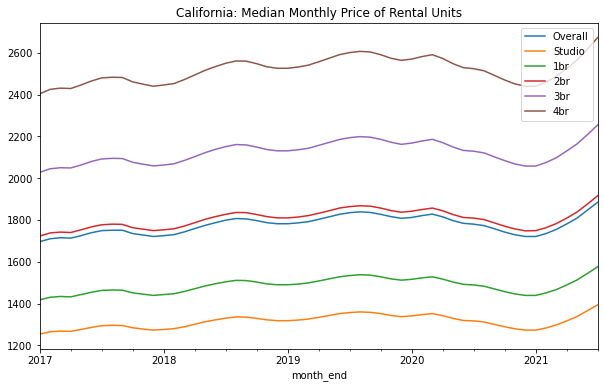

In [66]:
ax = record.plot(figsize=(10, 6))
ax.legend(labels=record.columns.tolist())
ax.set_title('California: Median Monthly Price of Rental Units')

In [42]:
df_metro = pd.read_csv('Apartment_List_Rent_Estimates_CBSA_2021_6.csv')

In [74]:
# doing the same thing as before, but with LA county data: 
city_name = 'Los Angeles-Long Beach-Anaheim, CA'
record_LA = df_metro.loc[df_metro['CBSA_Name'] == city_name].set_index('Bedroom_Size')
record_LA = record_LA.T.iloc[3:len(record_LA.T)]
record_LA.rename(columns={'_Overall':'Overall', '_Studio':'Studio'}, inplace=True)
record_LA = record_LA.astype('float')
# here's a block to change the date string to end of the month datetime
record_LA['year'] = [x[0:4] for x in record_LA.index]
record_LA['month'] = [x[-2:] for x in record_LA.index]
record_LA['month_end'] = record_LA['year']+ '-' + record_LA['month']+ '-' + '01'
record_LA['month_end'] = pd.to_datetime(record_LA['month_end'])
record_LA.set_index('month_end', inplace = True)
record_LA.index = record_LA.index.to_period('M').to_timestamp('M')
record_LA.drop(['year', 'month'], axis = 1, inplace = True)

In [77]:
# There's not much point in doing this; it looks exactly the same as the CA version from earlier

# ax = record_LA.plot(figsize=(10, 6))
# ax.legend(labels=record_LA.columns.tolist())
# ax.set_title('Los Angeles: Median Monthly Price of Rental Units')

### Comparing LA County (inc. Long Beach and OC) to Statewide Median


In [56]:
# USING CODE FROM JEREMY'S NOTEBOOK:

# change parameters here
city_name = 'Los Angeles-Long Beach-Anaheim, CA'
bdrm = '1br'

jrecord = df_metro.loc[(df_metro['CBSA_Name']== city_name) & (df_metro['Bedroom_Size'] == bdrm)]

jrecord = jrecord.T
rename = jrecord.columns[0]
jrecord = jrecord.rename(columns={rename:'Los Angeles County'}) 
jrecord = jrecord.iloc[4:]
jrecord['Los Angeles County'] = jrecord['Los Angeles County'].astype(float)
jrecord.reset_index(inplace = True)
jrecord.rename(columns = {'index':'month_year'}, inplace = True)

# here's a block to change the date string to end of the month datetime
jrecord['year'] = [x[0:4] for x in jrecord['month_year']]
jrecord['month'] = [x[-2:] for x in jrecord['month_year']]
jrecord['month_end'] = jrecord['year']+ '-' + jrecord['month']+ '-' + '01'
jrecord['month_end'] = pd.to_datetime(jrecord['month_end'])
jrecord.set_index('month_end', inplace = True)
jrecord.index = jrecord.index.to_period('M').to_timestamp('M')
jrecord.drop(['month_year', 'year', 'month'], axis = 1, inplace = True)

In [57]:
jrecord.head()

,Los Angeles County
month_end,
2017-01-31,1508.0
2017-02-28,1521.0
2017-03-31,1529.0
2017-04-30,1524.0
2017-05-31,1524.0


In [64]:
LA_1bd_vs_CA = pd.concat([jrecord['Los Angeles County'],record['1br']], axis=1)
LA_1bd_vs_CA.rename(columns={'1br':'California'},inplace = True)

,Los Angeles County,California
month_end,,
2017-01-31,1508.0,1418.0
2017-02-28,1521.0,1430.0
2017-03-31,1529.0,1434.0
2017-04-30,1524.0,1432.0
2017-05-31,1524.0,1443.0


Text(0.5, 1.0, 'Median Rent Price of 1 Bedroom Units: LA vs California')

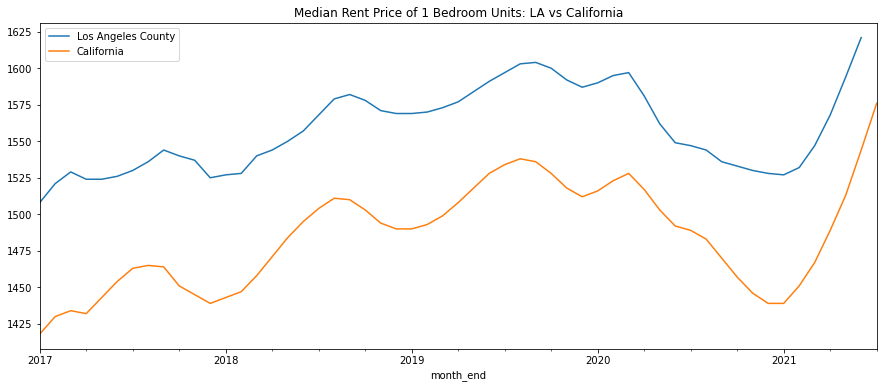

In [68]:
ax = LA_1bd_vs_CA.plot(figsize=(15, 6))
ax.set_title('Median Rent Price of 1 Bedroom Units: LA vs California')